# ***IMPORT NECESSARY LIBRARIES***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# ***LOAD THE DATASET***

In [ ]:
df = pd.read_csv("loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# ***OVERVIEW OF THE DATASET***

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.shape

(45000, 14)

In [ ]:
df.size

630000

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
df.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


# ***CLEANING AND PREPROCESSING THE DATASET***

In [ ]:
# To check the missing values
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
# to find the negative values in person_emp_exp
df[df['person_emp_exp'] < 0]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [ ]:
# To check unique values
for col in df:
  print(f"{col}: {df[col].nunique()} unique values")

person_age: 60 unique values
person_gender: 2 unique values
person_education: 5 unique values
person_income: 33989 unique values
person_emp_exp: 63 unique values
person_home_ownership: 4 unique values
loan_amnt: 4483 unique values
loan_intent: 6 unique values
loan_int_rate: 1302 unique values
loan_percent_income: 64 unique values
cb_person_cred_hist_length: 29 unique values
credit_score: 340 unique values
previous_loan_defaults_on_file: 2 unique values
loan_status: 2 unique values


In [ ]:
# To check the value counts of columns that appear categorical according to the dataset
discrete_cols1 = ['person_home_ownership','loan_intent','loan_amnt','credit_score','loan_status','loan_percent_income']
for col in discrete_cols1:
    print(f"{col}:\n{df[col].value_counts()}")
    print('-' * 50)

person_home_ownership:
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64
--------------------------------------------------
loan_intent:
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
--------------------------------------------------
loan_amnt:
loan_amnt
10000.0    3617
5000.0     2787
6000.0     2426
12000.0    2416
15000.0    2004
           ... 
16966.0       1
4968.0        1
16269.0       1
6081.0        1
2798.0        1
Name: count, Length: 4483, dtype: int64
--------------------------------------------------
credit_score:
credit_score
658    406
649    398
652    396
663    394
647    393
      ... 
762      1
768      1
457      1
446      1
767      1
Name: count, Length: 340, dtype: int64
--------------------------------------------------
loan_status:
loan_stat

In [ ]:
# To check the duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")


Number of duplicated rows: 0


***OUTLIER TREATMENT***

In [ ]:
# Finding out the Outliers
# Here we are using two methods to find out outliers
# 1. IQR Method
# 2. Z-Score Method

In [ ]:
# 1. IQR Method for Outlier Detection
Q1 = df['credit_score'].quantile(0.25)  # Calculate the first quartile (25th percentile)
Q3 = df['credit_score'].quantile(0.75)  # Calculate the third quartile (75th percentile)
IQR = Q3 - Q1  # Calculate the interquartile range

lower_bound = Q1 - 1.5 * IQR  # 1.5 is chosen for normal distribution
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['credit_score'] < lower_bound) | (df['credit_score'] > upper_bound)]

print(f'Number of outliers detected: {len(outliers)}')
print(outliers[['person_age','credit_score']])


Number of outliers detected: 467
       person_age  credit_score
81          144.0           789
172          25.0           484
183         144.0           807
353          23.0           491
575         123.0           805
...           ...           ...
44618        28.0           492
44676        24.0           462
44754        25.0           488
44954        25.0           482
44992        23.0           487

[467 rows x 2 columns]


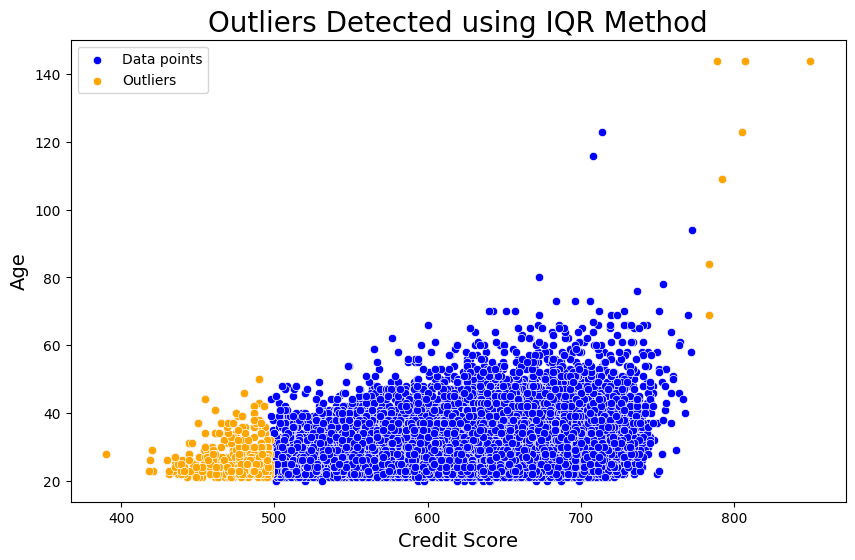

In [ ]:
# Visualisation of IQR Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['credit_score'], y=df['person_age'], color='blue', label='Data points')
sns.scatterplot(x=outliers['credit_score'], y=outliers['person_age'], color='Orange', label='Outliers')
plt.gca().set_facecolor('white')
plt.title('Outliers Detected using IQR Method', fontsize=20)
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend()
plt.show()

In [ ]:
# 2. Z-score Method for Outlier Detection
df['z_score'] = (df['credit_score'] - df['credit_score'].mean()) / df['credit_score'].std()
z_outliers = df[(df['z_score'] > 3) | (df['z_score'] <-3)]

print(f'Number of outliers detected using z_score: {len(z_outliers)}')
print(z_outliers[['person_age','credit_score','z_score']])


Number of outliers detected using z_score: 236
       person_age  credit_score   z_score
81          144.0           789  3.100794
183         144.0           807  3.457683
575         123.0           805  3.418029
596          22.0           447 -3.680095
748          23.0           460 -3.422342
...           ...           ...       ...
43296        30.0           455 -3.521477
43566        28.0           477 -3.085280
43732        31.0           446 -3.699922
44254        22.0           462 -3.382687
44676        24.0           462 -3.382687

[236 rows x 3 columns]


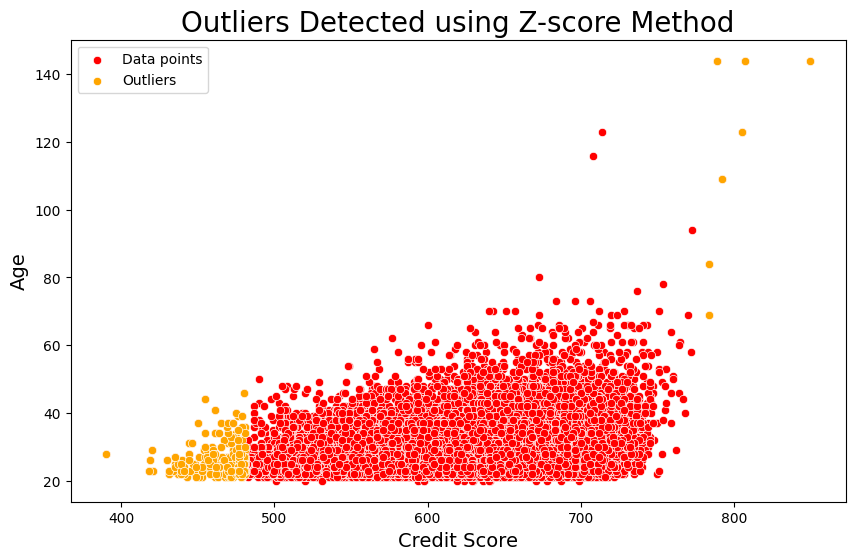

In [ ]:
# Visualisation of Z_score Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['credit_score'], y=df['person_age'], color='red', label='Data points')
sns.scatterplot(x=z_outliers['credit_score'], y=z_outliers['person_age'], color='Orange', label='Outliers')
plt.title('Outliers Detected using Z-score Method', fontsize=20)
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend()
plt.show()

In [ ]:
# Calculate z-scores for relevant columns
z_scores = df[['person_age', 'credit_score']].apply(zscore)

# Filter: Keep only the rows where both z-scores are within 3 standard deviations
df_no_outliers = df[(abs(z_scores) < 3).all(axis=1)]

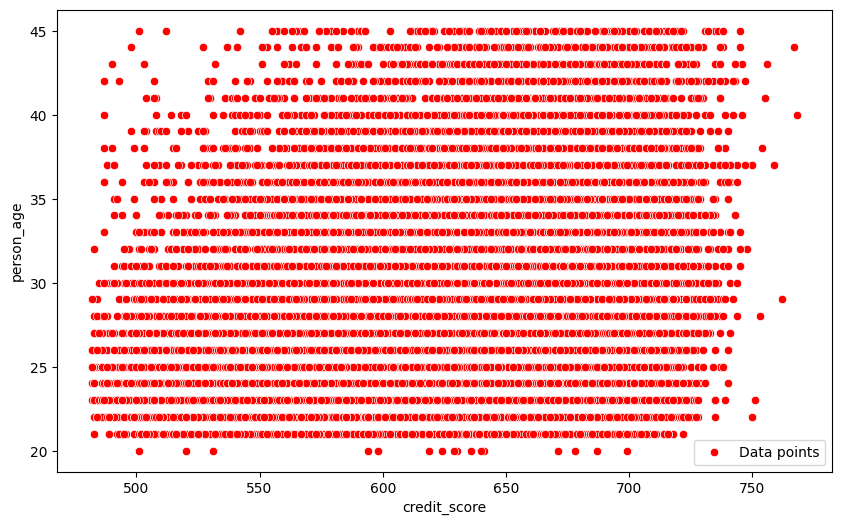

In [ ]:
# To Visualise after remova the outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_no_outliers['credit_score'], y=df_no_outliers['person_age'], color='red', label='Data points')
plt.show()

In [ ]:
# Calculates Skewness and Kurtosis for "credit_score"
skewness = stats.skew(df['credit_score'])
kurtosis = stats.kurtosis(df['credit_score'])

print(f"Skewness of credit score : {skewness}")
print(f"Kurtosis of credit score : {kurtosis}")

# Interpretatation
# if skewness >0 : Right skewed
# skewness< 0 : Left skewed
# kurtosis > 0 : high outliers
# kurtosis < 0  : Lower Outliers

Skewness of credit score : -0.6102404900416974
Kurtosis of credit score : 0.20286596870434082


Observation  

---> Skewness  : -0.618

A Negative Skewness indicates that the distridution of 'credit score' is left skewed.

This means that distribution has a longer tail extending towards higher value on left side.

----> kurtosis  : 0.202

A Kurtosis is greater than 0 distribution with higher outliers.

# ***DATA VISUALISATION***

Text(0.5, 1.0, 'Trend Analysis of Loan Amount Over Person Age')

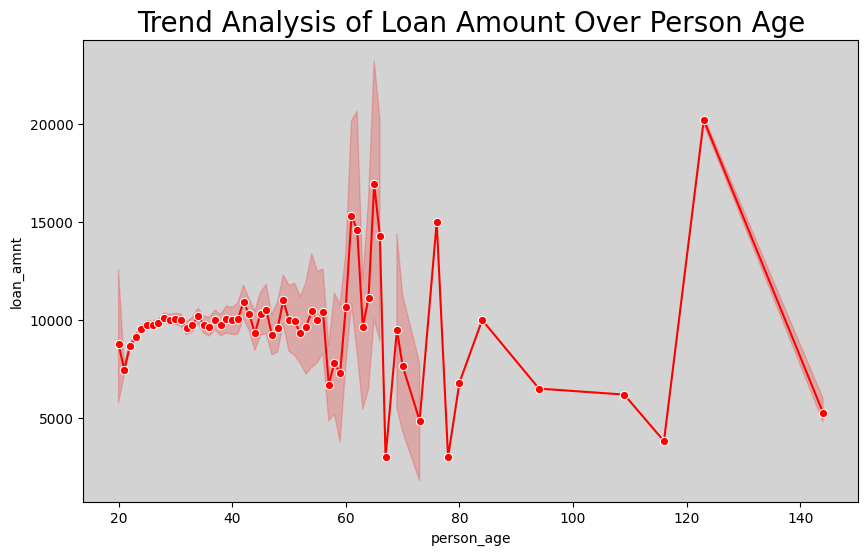

In [ ]:
# 1. Lineplot : Trend Analysis over the person age
plt.figure(figsize=(10, 6))
sns.lineplot(x='person_age', y='loan_amnt', data=df, color='red',marker = 'o')
plt.gca().set_facecolor('lightgray')
plt.title('Trend Analysis of Loan Amount Over Person Age', fontsize=20)

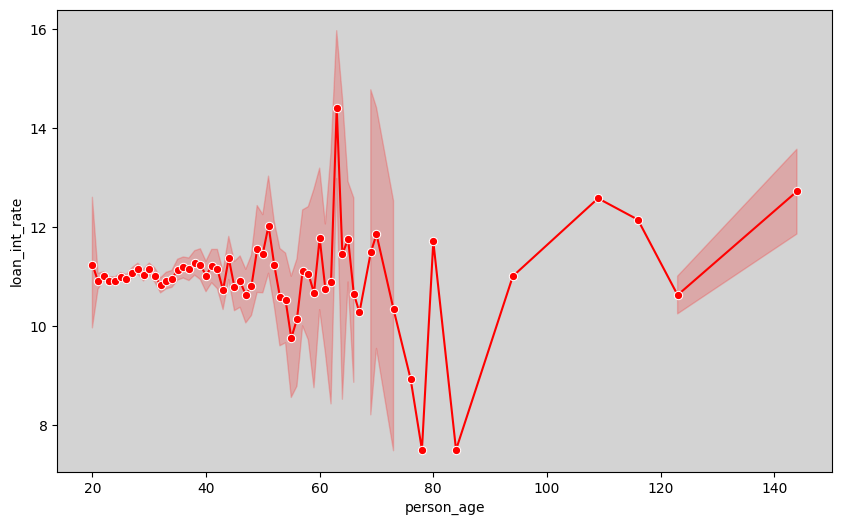

In [ ]:
# 2. Trend Analysis over the loan interest rate
plt.figure(figsize=(10, 6))
sns.lineplot(x='person_age', y='loan_int_rate', data=df, color='red',marker = 'o')
plt.gca().set_facecolor('lightgray')

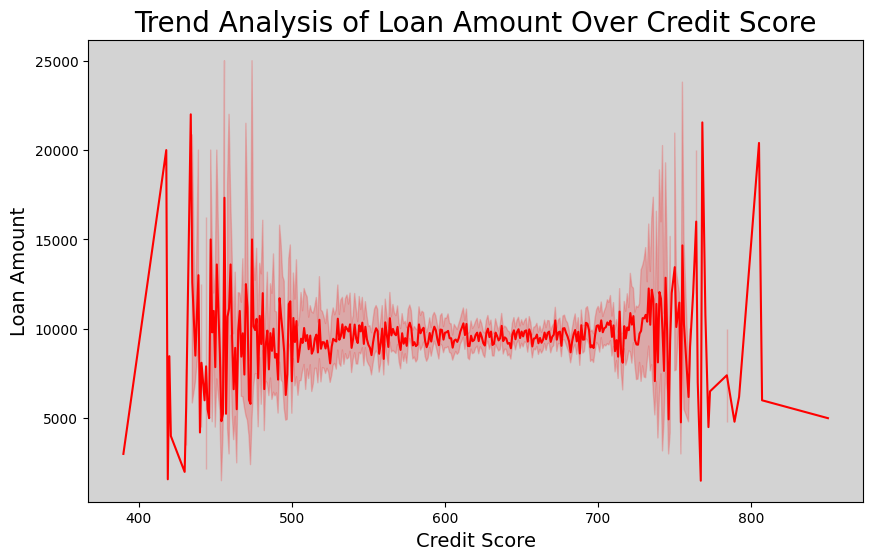

In [ ]:
# 3 . Line plot for credit score over the loan amount
plt.figure(figsize=(10, 6))
sns.lineplot(x='credit_score', y='loan_amnt', data=df, color='red')
plt.gca().set_facecolor('lightgray')
plt.title('Trend Analysis of Loan Amount Over Credit Score', fontsize=20)
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.show()


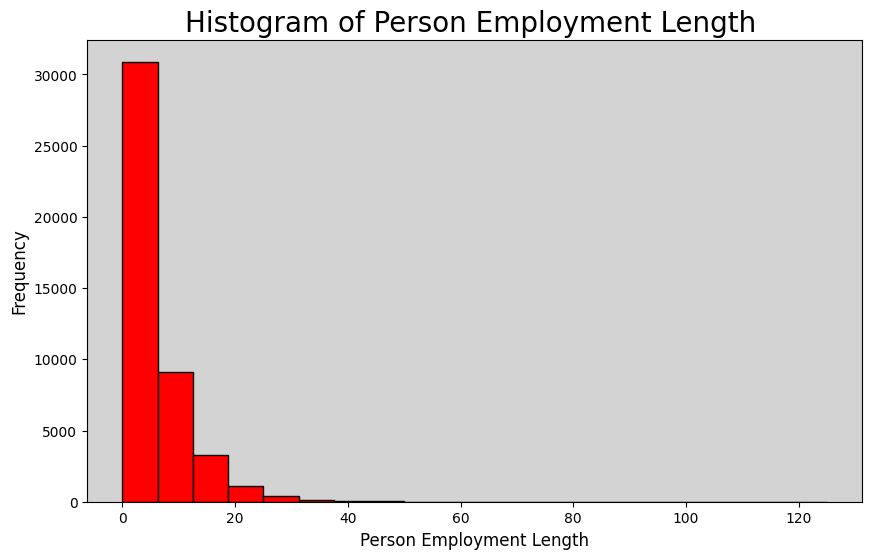

In [ ]:
# 4. Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['person_emp_exp'], edgecolor='black', bins =20, color='Red')
plt.gca().set_facecolor('lightgray')
plt.xlabel("Person Employment Length", fontsize = 12)
plt.ylabel("Frequency", fontsize =12)
plt.title("Histogram of Person Employment Length ", fontsize =20)
plt.show()

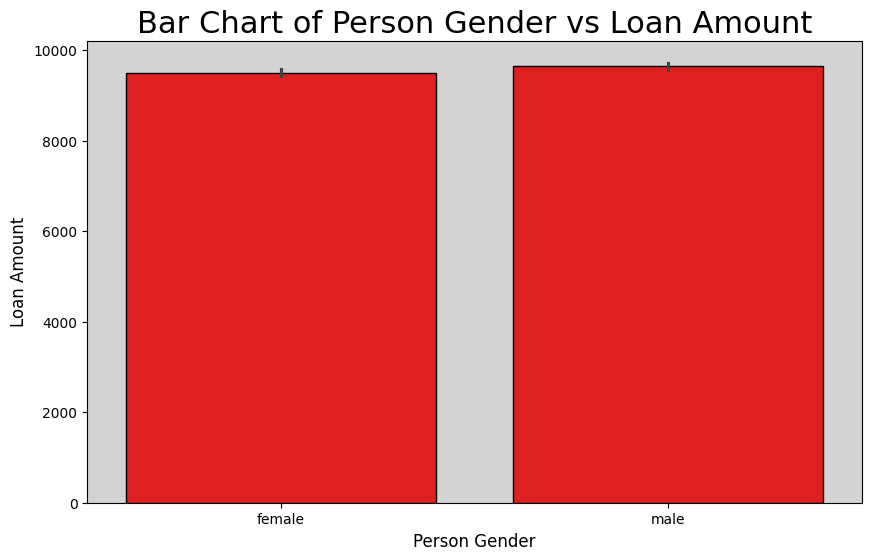

In [ ]:
# 5. Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x = 'person_gender', y = 'loan_amnt', data=df, edgecolor='Black', color = "Red")
plt.gca().set_facecolor('lightgrey')
plt.xlabel('Person Gender', fontsize = 12)
plt.ylabel('Loan Amount', fontsize = 12)
plt.title(f'Bar Chart of Person Gender vs Loan Amount', fontsize = 22)
plt.show()

# ***MODEL EVALUATION***

In [ ]:
# To convert the categorical columns into numerics
le = LabelEncoder()
df['person_gender'] = le.fit_transform(df['person_gender'])
df['person_education'] = le.fit_transform(df['person_education'])
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])

***DIVIDING THE DATASET***

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X

array([[ 22.,   0.,   4., ..., 561.,   0.,   1.],
       [ 21.,   0.,   3., ..., 504.,   1.,   0.],
       [ 25.,   0.,   3., ..., 635.,   0.,   1.],
       ...,
       [ 33.,   1.,   0., ..., 668.,   0.,   1.],
       [ 29.,   1.,   1., ..., 604.,   0.,   1.],
       [ 24.,   1.,   3., ..., 628.,   0.,   1.]])

In [ ]:
y

array([-1.4197983 , -2.54994646,  0.04741159, ...,  0.70170789,
       -0.56723039, -0.09137854])

***SPLITTING THE DATASET***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

array([[ 29.,   1.,   1., ..., 615.,   1.,   0.],
       [ 24.,   1.,   1., ..., 587.,   1.,   0.],
       [ 47.,   0.,   0., ..., 603.,   0.,   0.],
       ...,
       [ 26.,   1.,   0., ..., 624.,   1.,   0.],
       [ 25.,   0.,   1., ..., 698.,   0.,   0.],
       [ 25.,   1.,   3., ..., 614.,   1.,   0.]])

In [ ]:
X_test

array([[ 25.,   0.,   0., ..., 581.,   1.,   0.],
       [ 31.,   1.,   0., ..., 628.,   1.,   0.],
       [ 38.,   1.,   0., ..., 585.,   0.,   1.],
       ...,
       [ 23.,   0.,   3., ..., 654.,   1.,   0.],
       [ 27.,   0.,   3., ..., 475.,   1.,   0.],
       [ 30.,   0.,   0., ..., 584.,   0.,   0.]])

In [ ]:
y_train

array([-0.34913163, -0.90429213, -0.58705755, ..., -0.17068718,
        1.29652271, -0.36895879])

In [ ]:
y_test

array([-1.02325509, -0.09137854, -0.94394645, ...,  0.42412764,
       -3.12493412, -0.96377361])

***FEATURE SCALING***

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.20099106,  0.90291089, -0.50482293, ..., -0.34616916,
         0.98248667, -0.53147185],
       [-0.62103957,  0.90291089, -0.50482293, ..., -0.89999673,
         0.98248667, -0.53147185],
       [ 3.16030132, -1.107529  , -1.18145368, ..., -0.58352383,
        -1.01782552, -0.53147185],
       ...,
       [-0.29222732,  0.90291089, -1.18145368, ..., -0.16815315,
         0.98248667, -0.53147185],
       [-0.45663345, -1.107529  , -0.50482293, ...,  1.29553402,
        -1.01782552, -0.53147185],
       [-0.45663345,  0.90291089,  0.84843858, ..., -0.36594871,
         0.98248667, -0.53147185]])

In [ ]:
X_test

array([[-0.45663345, -1.107529  , -1.18145368, ..., -1.01867407,
         0.98248667, -0.53147185],
       [ 0.52980331,  0.90291089, -1.18145368, ..., -0.08903493,
         0.98248667, -0.53147185],
       [ 1.68064619,  0.90291089, -1.18145368, ..., -0.93955585,
        -1.01782552,  1.8815672 ],
       ...,
       [-0.7854457 , -1.107529  ,  0.84843858, ...,  0.42523354,
         0.98248667, -0.53147185],
       [-0.1278212 , -1.107529  ,  0.84843858, ..., -3.11530704,
         0.98248667, -0.53147185],
       [ 0.36539718, -1.107529  , -1.18145368, ..., -0.9593354 ,
        -1.01782552, -0.53147185]])

***RANDOM FOREST CLASSIFIER***

In [ ]:
classifier = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5)
y_train = y_train.astype('int')
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
y_pred=classifier.predict(X_test)
df=pd.DataFrame(y_pred,y_test)
df

,0
-1.023255,-1
-0.091379,0
-0.943946,0
-0.963774,0
0.146547,0
...,...
1.038770,1
0.503436,0
0.424128,0
-3.124934,-1


In [ ]:
y_test = y_test.astype(int)
accuracy_score(y_test,y_pred)
print("Accuracy Score:", accuracy_score(y_test, y_pred))



Accuracy Score: 0.937


***LOGISTIC REGRESSION***

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# To make prediction
y_pred=classifier.predict(X_test)
df=pd.DataFrame(y_pred,y_test)
df

,0
-1,-1
0,0
0,0
0,0
0,0
...,...
1,1
0,0
0,0
-3,-2


In [ ]:
# To check the Accuracy score
accuracy_score(y_test,y_pred)
print("Accuracy Score:", accuracy_score(y_test, y_pred))



Accuracy Score: 0.9906666666666667


***SUPPORT VECTOR CLASSIFIER***

In [ ]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make Predictions
y_pred = svm.predict(X_test)
df=pd.DataFrame(y_pred,y_test)
df


,0
-1,-1
0,0
0,0
0,0
0,0
...,...
1,1
0,0
0,0
-3,-3


In [ ]:
# To check the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9983333333333333


***Conclusin***

Among the three models Logistic Regression , Random Forest Classifier and Support Vector Classifier ,and SVC model performbest on the given dataset in terms of accuracy. Therefore, SVM is the most suitable model for this classification task based on the current data.